# ---------------------------------------------------------------------------------------------------------
# Librerías
# ---------------------------------------------------------------------------------------------------------

In [1]:
import urllib.request
import os
import zipfile

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


import numpy as np

## Ubicación de imágenes de modelo y de test.

In [2]:
#Directorio base
base_dir = 'C:/Users/Saul/Desktop/SAUL/INFORMATICA/UBU 4º/2º semestre/TFG/Fotos_Proyecto_Detección_de_Bajas'

train_dir = os.path.join(base_dir, 'Entrenamiento')
validation_dir = os.path.join(base_dir, 'Validacion')

# Directorio con las fotos de gallinas clasificadas
train_alive_dir = os.path.join(train_dir, 'Gallinas_vivas')
train_dead_dir = os.path.join(train_dir, 'Gallinas_muertas')

# Directorio con las imágenes de modelo
validation_alive_dir = os.path.join(validation_dir, 'Gallinas_vivas')
validation_dead_dir = os.path.join(validation_dir, 'Gallinas_muertas')

# ---------------------------------------------------------------------------------------------------------
# PREPROCESAMIENTO DE LOS DATOS
# ---------------------------------------------------------------------------------------------------------

## Prueba nº2: Aumentar el nº de capas de convolución

In [3]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Conv2D(filtros, tamaño_kernel, activacion, input_shape)
    # input_size es la forma deseada de la imagen (150x150) con 3 bytes de color
    # Bloque de convolución 1
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Bloque de convolución 2
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    # Bloque de convolución 3
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'), 
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # "Aplana" los resultados para pasárselos a una DNN (Deep neural network)
    tf.keras.layers.Flatten(), 
    
    # Neuronas de capa oculta: 512
    tf.keras.layers.Dense(512, activation='relu')
    , 
    # Neurona de salida que devuelve dos valores: 0 para gallinas muertas y 1 para gallinas vivas.
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [4]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [5]:
# Reescalado de imágenes a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# ------------------------------------------------------------------------
# Entrenamiento de las imágenes en lotes de 5 utilizando "train_datagen"
# ------------------------------------------------------------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

# ------------------------------------------------------------------------
# Validación de las imágenes en lotes de 5 utilizando "test_datagen"
# ------------------------------------------------------------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=5,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 161 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


## Entrenamiento

In [6]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=25,
                              verbose=2)

Epoch 1/25
33/33 - 101s - loss: 1.7948 - accuracy: 0.7143 - val_loss: 0.6447 - val_accuracy: 0.7286 - 101s/epoch - 3s/step
Epoch 2/25
33/33 - 92s - loss: 0.6349 - accuracy: 0.7391 - val_loss: 0.6134 - val_accuracy: 0.7286 - 92s/epoch - 3s/step
Epoch 3/25
33/33 - 92s - loss: 0.6124 - accuracy: 0.7391 - val_loss: 0.5912 - val_accuracy: 0.7286 - 92s/epoch - 3s/step
Epoch 4/25
33/33 - 98s - loss: 0.6003 - accuracy: 0.7391 - val_loss: 0.5893 - val_accuracy: 0.7286 - 98s/epoch - 3s/step
Epoch 5/25
33/33 - 96s - loss: 0.5797 - accuracy: 0.7391 - val_loss: 2.9698 - val_accuracy: 0.7286 - 96s/epoch - 3s/step
Epoch 6/25
33/33 - 100s - loss: 0.6568 - accuracy: 0.7391 - val_loss: 0.5875 - val_accuracy: 0.7286 - 100s/epoch - 3s/step
Epoch 7/25
33/33 - 98s - loss: 0.6054 - accuracy: 0.7391 - val_loss: 0.5853 - val_accuracy: 0.7286 - 98s/epoch - 3s/step
Epoch 8/25
33/33 - 102s - loss: 0.8230 - accuracy: 0.7391 - val_loss: 0.5859 - val_accuracy: 0.7286 - 102s/epoch - 3s/step
Epoch 9/25
33/33 - 100s - 

In [7]:
resultado = model.evaluate(validation_generator, verbose=0)
print(f'Pérdida: {resultado[0]} / Precisión: {resultado[1]}')

Pérdida: 6.8979105949401855 / Precisión: 0.6714285612106323


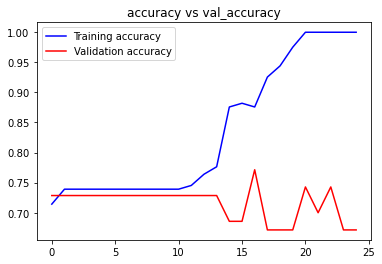

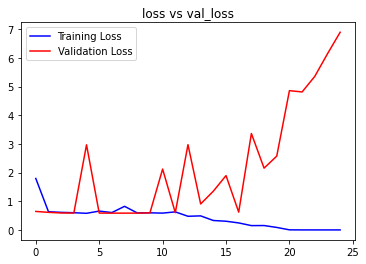

In [8]:
#-----------------------------------------------------------
# Recupero los valores para dibujar las gráficas
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Accuracy vs val_accuracy
#------------------------------------------------
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('accuracy vs val_accuracy')
plt.legend()

plt.figure()

#------------------------------------------------
# Loss vs val_loss
#------------------------------------------------
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('loss vs val_loss')
plt.legend()

plt.show()

## Función de clasificación

In [9]:
def clasificacion(path):
    img=image.load_img(path, target_size=(150, 150))
  
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    classes = model.predict(images, batch_size=10)
  
    if classes[0]>0:
        print("Está viva")
    else:
        print("Está muerta")

# ----------------------------------------------------------------------------------------------------
# Pruebas de clasificación
# ----------------------------------------------------------------------------------------------------

In [10]:
#Directorio que contiene una foto de una gallina, independientemente de su estado, para su clasificación
path='C:/Users/Saul/Desktop/SAUL/INFORMATICA/UBU 4º/2º semestre/TFG/Fotos_Proyecto_Detección_de_Bajas/Prediccion/I_1.jpg'

clasificacion(path)

Está viva
